# Titanic Preprocessing
Filippo Fantinato 2041620

On this notebook you can find my persoanl preprocessing of the Titanic dataset available on Kaggle. I evaluated the dirty and cleaned dataset on SVM and KNN classifiers and then I compared them.

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Let's download the dataset from my personal drive,

In [90]:
!gdown --id 13xld7kwHCyyx_6sPXTpK_LJCvABe8B7f

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=13xld7kwHCyyx_6sPXTpK_LJCvABe8B7f
To: /content/titanic.csv
100% 89.3k/89.3k [00:00<00:00, 78.2MB/s]


import it,

In [91]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


set the name as the index and remove the column name.

In [92]:
df.index = df['Name']
df = df.drop(['Name'], axis = 1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
"Allen, Mr. William Henry",5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


## Helper methods

Here below you can find some useful methods:
- **split_dataset**: which splits the dataset according to the column to predict;
- **svm_evaluation**: which evaluates the dataset on a SVM model;
- **knn_evaluation**: which evaluates the dataset on a KNN model with 5 neighbors.

In [93]:
def split_dataset(df):
  X = df.drop(['Survived'], axis = 1)
  y = df['Survived']
  return X, y

In [94]:
from sklearn import svm
from sklearn.metrics import accuracy_score


def svm_evaluation(X_train, y_train, X_test, y_test):
  svm_model = svm.SVC()
  svm_model.fit(X_train, y_train)
  y_predicted = svm_model.predict(X_test)
  accuracy = accuracy_score(y_test, y_predicted)
  
  return accuracy

In [95]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


def knn_evaluation(X_train, y_train, X_test, y_test, n_neighbors = 5):
  knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)
  knn_model.fit(X_train, y_train)
  y_predicted = knn_model.predict(X_test)
  accuracy = accuracy_score(y_test, y_predicted)

  return accuracy

## Filling the fields

Let's before see which fields contain null values and the type of those fields

In [96]:
df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          2
dtype: int64

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, Braund, Mr. Owen Harris to Peter, Master. Michael J
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1309 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(4)
memory usage: 122.7+ KB


The fields with null values are the following:
- **Age**: representing the age of a passenger;
- **Cabin**: representing the cabin ID where a passenger was located;
- **Embarked**: from which harbor a passenger embarked.


Let's first of all cope with the field Age. Since the field is numeric and from the fact that it represents the age of a pass, in my opinion it's safe to fill the Null values with the mean among all the ages.

In [98]:
df['Age'].fillna(df['Age'].median(), inplace = True)
df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          2
dtype: int64

Regarding the field Embarked, in my opinion it's safe to fill the Null values with most frequent value on that column.

In [99]:
mfv_embarked = df['Embarked'].mode()[0]
df['Embarked'].fillna(mfv_embarked, inplace = True)

Since to the cabin field it's something too difficult to predict, I chose to fill the Null values with an empty string.

In [100]:
df['Cabin'].fillna('', inplace = True)

Now as you can see there is no more Null values in the dataset. 

In [101]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [102]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,,S
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
"Allen, Mr. William Henry",5,0,3,male,35.0,0,0,373450,8.0500,,S


## Dirty dataset

### Preprocessing

Let's convert any non numerical variable into a numerical one exploting the get_dummies method offered by pandas.

In [103]:
df_dirty = df.copy()
df_dirty = pd.get_dummies(df_dirty, columns=['Sex', 'Ticket', 'Cabin', 'Embarked'])
df_dirty.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Ticket_110152,...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
Name,,,,,,,,,,,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,22.0,1,0,7.2500,0,1,0,...,0,0,0,0,0,0,0,0,0,1
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,38.0,1,0,71.2833,1,0,0,...,0,0,0,0,0,0,0,1,0,0
"Heikkinen, Miss. Laina",3,1,3,26.0,0,0,7.9250,1,0,0,...,0,0,0,0,0,0,0,0,0,1
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,35.0,1,0,53.1000,1,0,0,...,0,0,0,0,0,0,0,0,0,1
"Allen, Mr. William Henry",5,0,3,35.0,0,0,8.0500,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [104]:
X_dirty, y_dirty = split_dataset(df_dirty)
X_dirty_train, X_dirty_test, y_dirty_train, y_dirty_test = train_test_split(X_dirty, y_dirty, test_size=0.20, random_state=42)

### SVM

In [105]:
svm_acc_dirty = svm_evaluation(X_dirty_train, y_dirty_train, X_dirty_test, y_dirty_test)

print("SVM accuracy:", svm_acc_dirty)

SVM accuracy: 0.6030534351145038


### KNN

In [106]:
knn_acc_dirty = knn_evaluation(X_dirty_train, y_dirty_train, X_dirty_test, y_dirty_test)

print("KNN accuracy:", knn_acc_dirty)

KNN accuracy: 0.6335877862595419


## Cleaning the dataset removing by hands the columns 

### Preprocessing

In [107]:
df_clean = df.copy()
df_clean.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,,S
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
"Allen, Mr. William Henry",5,0,3,male,35.0,0,0,373450,8.0500,,S


Let's remove the following columns because in my opinion are useless: 
- **PassengerId**: the passenger id is totally unrelated to the survability of them;
- **SibSp**: same for the number of siblings;
- **Parch**: same for the number of parents;
- **Ticket**: same for the ticket number.
- **Embarked**: same for the harbor where a passenger is embarked;
- **Cabin**: the cabin maybe can be relevant since who had an higher cabin could survive with an higher probability, but I removed it since there is also the column Fare, which corresponds to the money payed for the journey, assuming that who payed more had an higher cabin. So I removed the cain column because it was a reduntant information;
- **Pclass**: the ticket class of a passenger can be relevant, since the richer people have been saved with higher probability, but I removed it for the same reason as the cabin column.

In [108]:
useless_columns = ['PassengerId', 'SibSp', 'Parch', 'Ticket', 'Embarked', 'Cabin', 'Pclass']
df_clean = df_clean.drop(useless_columns, axis = 1)
df_clean.head()

,Survived,Sex,Age,Fare
Name,,,,
"Braund, Mr. Owen Harris",0,male,22.0,7.2500
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",1,female,38.0,71.2833
"Heikkinen, Miss. Laina",1,female,26.0,7.9250
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,53.1000
"Allen, Mr. William Henry",0,male,35.0,8.0500


In [109]:
df_clean = pd.get_dummies(df_clean, columns=['Sex'])
df_clean.head()

,Survived,Age,Fare,Sex_female,Sex_male
Name,,,,,
"Braund, Mr. Owen Harris",0,22.0,7.2500,0,1
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",1,38.0,71.2833,1,0
"Heikkinen, Miss. Laina",1,26.0,7.9250,1,0
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,53.1000,1,0
"Allen, Mr. William Henry",0,35.0,8.0500,0,1


In [110]:
X_clean, y_clean = split_dataset(df_clean)
X_clean_train, X_clean_test, y_clean_train, y_clean_test = train_test_split(X_clean, y_clean, test_size=0.20, random_state=42)

#### SVM

In [111]:
svm_acc_clean = svm_evaluation(X_clean_train, y_clean_train, X_clean_test, y_clean_test)

print("SVM accuracy:", svm_acc_clean)

SVM accuracy: 0.6335877862595419


#### KNN

In [112]:
knn_acc_clean = knn_evaluation(X_clean_train, y_clean_train, X_clean_test, y_clean_test)

print("KNN accuracy:", knn_acc_clean)

KNN accuracy: 0.7404580152671756


## Conclusions

As can be seen from the graph, the accuracy obtained on both SVM and KNN models are better exploiting the cleaned dataset, there I can conclude that the preprocessing worked.

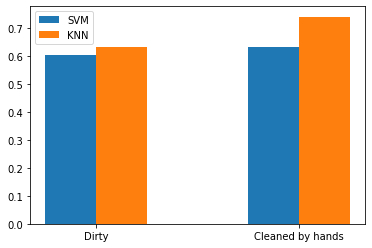

In [113]:
import matplotlib.pyplot as plt

x_plot = np.arange(2)

labels = ['Dirty', 'Cleaned by hands']
svm_acc = [
  svm_acc_dirty,
  svm_acc_clean,
]
knn_acc = [
  knn_acc_dirty,
  knn_acc_clean,
]
plt.bar(x_plot + -0.125, svm_acc, width=0.25)
plt.bar(x_plot + 0.125, knn_acc, width=0.25)
plt.xticks(x_plot, labels)
plt.legend([
  "SVM", 
  "KNN"
])

plt.show()